In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# IF YOU'RE USING A PLUGIN FOR DARK-MODE, UNCOMMMENT THE FOLLOWING LINES
import matplotlib
matplotlib.rcParams['text.color'] = 'white'
matplotlib.rcParams['axes.labelcolor'] = 'white'
matplotlib.rcParams['xtick.color'] = 'white'
matplotlib.rcParams['ytick.color'] = 'white'

In [2]:
# HYPERPARAMETERS
n_states = 20
start_state = 10
terminal_states = [1, 20]
actions = ['l', 'r']

In [9]:
reward_table = pd.DataFrame({
    'l': [-1, 0, 0, 0, 0, 0, 0,  0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,  0,  0],
    'r': [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1]
}, index=[x+1 for x in range(20)])

reward_table

,l,r
1,-1,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0
10,0,0


In [107]:
# Init our q-learning table
q_table = pd.DataFrame({
    'l': [0 for x in range(20)],
    'r': [0 for x in range(20)]
}, index=[x+1 for x in range(20)])

In [108]:
def episode(start_state, 
            terminal_states, 
            q_table, 
            reward_table, 
            alpha=0.02, 
            gamma=1, 
            epsilon=10e-3):
    
    action_trajectory = []
    current_state = start_state
    
    while current_state not in terminal_states:
        
        # Selecting a e-greedy action
        # Greedy
        if np.random.random() > epsilon:
            
            state_table = q_table.loc[current_state]
            
            q_sa = np.max(state_table)
            
            # If there is more than one column tied for np.max()...
            if len(state_table[state_table == q_sa]) > 1:
                
                # Pulling out the action names from the index
                A = np.random.choice(state_table[state_table == q_sa].index.tolist())
                
            else:
                
                A = state_table[state_table == q_sa].index[0]
            
        else:
            
            A = np.random.choice(q_table.columns.tolist())
            
            q_sa = q_table.loc[current_state][A]
            
        # Computing s_prime
        if A == 'l':
            
            s_prime = current_state - 1
            
        else:
            
            s_prime = current_state + 1
            
        # Pulling out the reward
        reward = reward_table.loc[s_prime][A]
        
        # Getting max
        if s_prime in terminal_states:
            q_saplus = 0
            
        else:
            q_saplus = np.max(q_table.loc[s_prime][A])
        
        QSA = q_sa + alpha * (reward + gamma * q_saplus - q_sa)
        
        q_table.loc[current_state, A] = QSA
        
        # Before updating the state, note state-action pairs
        action_trajectory.append((current_state, A))

        current_state = s_prime
        
    return q_table, action_trajectory

In [109]:
n_episodes = 10000
cumsum_r_ts = []
all_episodes = []
for i in range(n_episodes):

    q_table, action_trajectory = episode(start_state=start_state, 
                                   terminal_states=terminal_states, 
                                   q_table=q_table, 
                                   reward_table=reward_table, 
                                   alpha=0.02, 
                                   gamma=1, 
                                   epsilon=10e-3)
    
    cumsum_r = 0
    for step in action_trajectory:
        
        # Pulling the value out of the table
        reward = q_table.loc[step[0], step[1]]
        
        cumsum_r += reward
        
    cumsum_r_ts.append(cumsum_r)
        

In [98]:
q_table

,l,r
1,0.000000e+00,0.000000
2,-2.000000e-02,0.000000
3,-4.000000e-04,0.000000
4,-8.000000e-06,0.000000
5,-1.600000e-07,0.000000
6,-3.200000e-09,0.000000
7,-6.400000e-11,0.000000
8,-1.280000e-12,0.000000
9,-2.560000e-14,0.000000
10,-5.120000e-16,0.000034


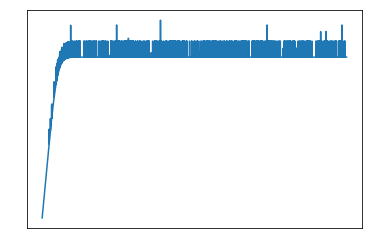

In [110]:
plt.plot(cumsum_r_ts)